# AULA 1

## 1. Importar base de dados json do API do IBGE

In [ ]:
import pandas as pd 

#Acesssar API
uri_f='https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f'
uri_m='https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m'

#Lear banco de dados
nomes_f=pd.read_json(uri_f)
nomes_m=pd.read_json(uri_m)

In [ ]:
print('Nomes femininos:', len(nomes_f),'\n' )
nomes_f.head(5)

Nomes femininos: 200 



,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [ ]:
print('Nomes masculinos:', len(nomes_m),'\n' )
nomes_m.head(5)

Nomes masculinos: 200 



,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


## 2. Concatenar tabelas de nomes 

In [ ]:
frames=[nomes_f,nomes_m]
nomes=pd.concat(frames)['nome'].to_frame()
print("Total de nomes :", len(nomes),'\n')
nomes.sample(10)

Total de nomes : 400 



,nome
29,RENATA
93,ADILSON
49,ANGELA
58,DAVI
114,ELZA
163,NIVALDO
199,NILZA
90,FABIANO
100,ROSELI
199,GEOVANE


## 3. Criar ID para os alunos

In [ ]:
import numpy as np
np.random.seed(42)
total_alunos=len(nomes)

#Atribuir nome aleatório (fixo) como ID
nomes['id_aluno']=np.random.permutation(total_alunos)+1
nomes.sample(5)

,nome,id_aluno
85,FABRICIO,342
39,ROSA,142
11,GABRIEL,113
199,NILZA,303
35,ALEXANDRE,358


## 4. Criar e-mail

In [ ]:
dominios=['@gmail.com','@coc.ufrj.br']
#Selecionar dominio por escilha aleatória 
nomes['dominio']=np.random.choice(dominios,total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
158,INGRID,317,@gmail.com
181,YURI,309,@gmail.com
5,JULIANA,85,@gmail.com
196,ARLINDO,107,@gmail.com
192,ZILDA,372,@coc.ufrj.br


In [ ]:
#Concatenar colunas
nomes['email']=nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
42,MARLENE,77,@coc.ufrj.br,marlene@coc.ufrj.br
91,WESLEY,48,@gmail.com,wesley@gmail.com
15,LETICIA,43,@coc.ufrj.br,leticia@coc.ufrj.br
182,CHARLES,150,@gmail.com,charles@gmail.com
65,MAURICIO,143,@coc.ufrj.br,mauricio@coc.ufrj.br


# AULA 2

## 1. Criar tabela de cursos

In [ ]:
# bibliotecas necessárias 
! pip install html5lib
! pip install lxml

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
#Coverter lista em dataframe
cursos=cursos[0]
cursos.sample(5)

,Nome do curso
15,Estatística básica
8,TDD com Java
13,Desenvolvendo jogos
17,Programação funcional
10,Preparatório para certificação Java


## 2. Manipular tabela de cursos

In [ ]:
cursos=cursos.rename(columns={'Nome do curso':'nome_do_curso'})
cursos.sample(5)

,nome_do_curso
9,Código limpo com C#
4,Cursos de Python
10,Preparatório para certificação Java
11,Hardware básico
18,Boas práticas em Java


In [ ]:
#Atribuir ID aleatório
cursos['id']=np.random.permutation(len(cursos))+1
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,9
1,Java para Web,18
2,C# para Web,14
3,Ruby on Rails,16
4,Cursos de Python,19


In [ ]:
# Atribuir inidice ao ID
cursos=cursos.set_index('id')
cursos.head(5)

,nome_do_curso
id,
9,Lógica de programação
18,Java para Web
14,C# para Web
16,Ruby on Rails
19,Cursos de Python


# AULA 3

## 1.Matricular alunos nos cursos

In [ ]:
# Assumindo que os poucos alunos fazem mais de um curso
nomes['matriculas']=np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
195,ROSANE,341,@coc.ufrj.br,rosane@coc.ufrj.br,9
14,MARCELO,300,@coc.ufrj.br,marcelo@coc.ufrj.br,3
28,SONIA,263,@gmail.com,sonia@gmail.com,1
74,LAURA,389,@gmail.com,laura@gmail.com,3
85,HELENA,64,@gmail.com,helena@gmail.com,1


In [ ]:
#Descrtiva 
nomes.describe()

,id_aluno,matriculas
count,400.000000,400.0000
mean,200.500000,2.0350
std,115.614301,1.4931
min,1.000000,1.0000
25%,100.750000,1.0000
50%,200.500000,2.0000
75%,300.250000,3.0000
max,400.000000,11.0000


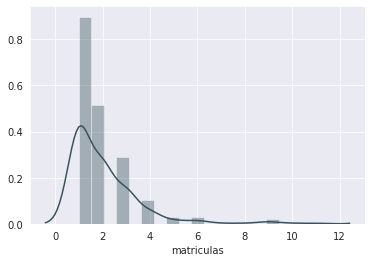

In [ ]:
# Visulizar 
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("GnBu_d")
dist=sns.distplot(nomes.matriculas,)

In [ ]:
# Numero de alunos por curso
nomes.matriculas.value_counts()

1     189
2     108
3      61
4      22
6       6
5       6
9       4
11      1
10      1
8       1
7       1
Name: matriculas, dtype: int64

## 2. Selecionar cursos de forma aletória

In [ ]:
# Atribuição proporcional
todas_matriculas=[]
x=np.random.rand(20)
prob=x/sum(x)

for index,row in nomes.iterrows():
  id=row.id_aluno
  matriculas=row.matriculas
  for i in range(matriculas):
    mat=[id,np.random.choice(cursos.index,p=prob)]
    todas_matriculas.append(mat)

matriculas=pd.DataFrame(todas_matriculas,columns=['id_aluno','id_curso'])


In [ ]:
# Contar Nº de inscritos por curso
matriculas_popr_curso=matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_popr_curso.sample(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
15,72,.NET para web
9,64,Lógica de programação
13,56,Persistência com .NET
19,9,Cursos de Python
1,27,Programação funcional
5,80,Orientação objetos com Java
8,47,Internet das coisas
7,50,Hardware básico
10,19,Código limpo com C#


## 3. Saída em diferentes formatos

In [ ]:
matriculas_popr_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,27,Programação funcional
2,15,PHP com MySql
3,2,TDD com Java
4,86,Desenvolvendo jogos
5,80,Orientação objetos com Java
6,37,Novas integrações com Java
7,50,Hardware básico
8,47,Internet das coisas
9,64,Lógica de programação


In [ ]:
# CSV
matriculas_popr_curso.to_csv('CSV_arquivo.csv',sep=',')
ler=pd.read_csv('CSV_arquivo.csv')
ler.head(10)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,27,Programação funcional
1,2,15,PHP com MySql
2,3,2,TDD com Java
3,4,86,Desenvolvendo jogos
4,5,80,Orientação objetos com Java
5,6,37,Novas integrações com Java
6,7,50,Hardware básico
7,8,47,Internet das coisas
8,9,64,Lógica de programação
9,10,19,Código limpo com C#


In [ ]:
# JSON
JSON_arquivo=matriculas_popr_curso.to_json
JSON_arquivo

<bound method NDFrame.to_json of           quantidade_de_alunos                        nome_do_curso
id_curso                                                           
1                           27                Programação funcional
2                           15                        PHP com MySql
3                            2                         TDD com Java
4                           86                  Desenvolvendo jogos
5                           80          Orientação objetos com Java
6                           37           Novas integrações com Java
7                           50                      Hardware básico
8                           47                  Internet das coisas
9                           64                Lógica de programação
10                          19                  Código limpo com C#
11                          34  Preparatório para certificação Java
12                          39                   Estatística básica
13             

In [ ]:
# HTML -> '()' no final da função faz difernça na exibição
HTML_arquivo=matriculas_popr_curso.to_html
HTML_arquivo

<bound method DataFrame.to_html of           quantidade_de_alunos                        nome_do_curso
id_curso                                                           
1                           27                Programação funcional
2                           15                        PHP com MySql
3                            2                         TDD com Java
4                           86                  Desenvolvendo jogos
5                           80          Orientação objetos com Java
6                           37           Novas integrações com Java
7                           50                      Hardware básico
8                           47                  Internet das coisas
9                           64                Lógica de programação
10                          19                  Código limpo com C#
11                          34  Preparatório para certificação Java
12                          39                   Estatística básica
13           

# AULA 4

## 1. Criando o banco SQL


In [ ]:
# Instalar biblioteca 
!pip install sqlalchemy

In [ ]:
# Importar biblioteca 
from sqlalchemy import create_engine,MetaData,table

In [ ]:
# Criar eng
engine=create_engine('sqlite:///memory:')
engine

Engine(sqlite:///memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_popr_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,27,Programação funcional
2,15,PHP com MySql
3,2,TDD com Java
4,86,Desenvolvendo jogos
5,80,Orientação objetos com Java
6,37,Novas integrações com Java
7,50,Hardware básico
8,47,Internet das coisas
9,64,Lógica de programação


In [ ]:
# Criar banco de dados
matriculas_popr_curso.to_sql('matriculas',engine)

In [ ]:
print(engine.table_names())

['matriculas']


## 2. Buscando no banco SQL

In [ ]:
query='select * from matriculas'
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,27,Programação funcional
1,2,15,PHP com MySql
2,3,2,TDD com Java
3,4,86,Desenvolvendo jogos
4,5,80,Orientação objetos com Java
5,6,37,Novas integrações com Java
6,7,50,Hardware básico
7,8,47,Internet das coisas
8,9,64,Lógica de programação
9,10,19,Código limpo com C#


In [ ]:
query='select * from matriculas where quantidade_de_alunos >40'
pd.read_sql(query,engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,4,86,Desenvolvendo jogos
1,5,80,Orientação objetos com Java
2,7,50,Hardware básico
3,8,47,Internet das coisas
4,9,64,Lógica de programação
5,13,56,Persistência com .NET
6,14,77,C# para Web
7,15,72,.NET para web
8,16,76,Ruby on Rails


In [ ]:
# Ler tabelas 
muitas_matriculas=pd.read_sql_table('matriculas',engine,columns=['nome_do_curso','quantidade_de_alunos'])
muitas_matriculas.head(10)

,nome_do_curso,quantidade_de_alunos
0,Programação funcional,27
1,PHP com MySql,15
2,TDD com Java,2
3,Desenvolvendo jogos,86
4,Orientação objetos com Java,80
5,Novas integrações com Java,37
6,Hardware básico,50
7,Internet das coisas,47
8,Lógica de programação,64
9,Código limpo com C#,19


In [ ]:
#Query direto do pandas 
matriculas_70=muitas_matriculas.query('quantidade_de_alunos>70')
matriculas_70

,nome_do_curso,quantidade_de_alunos
3,Desenvolvendo jogos,86
4,Orientação objetos com Java,80
13,C# para Web,77
14,.NET para web,72
15,Ruby on Rails,76


## 3.  Escrevendo no banco

In [ ]:
matriculas_70.to_sql('muitas_matriculas',engine)

In [ ]:
# O Banco de adados agora tem duas tabeals
print(engine.table_names())

['matriculas', 'muitas_matriculas']


In [ ]:
query='select * from muitas_matriculas'
pd.read_sql(query,engine)

,index,nome_do_curso,quantidade_de_alunos
0,3,Desenvolvendo jogos,86
1,4,Orientação objetos com Java,80
2,13,C# para Web,77
3,14,.NET para web,72
4,15,Ruby on Rails,76


# AULA 5

## 1. Nomes da próxima turma

In [ ]:
matriculas_popr_curso.sort_values('quantidade_de_alunos',ascending=False).head(5)

,quantidade_de_alunos,nome_do_curso
id_curso,,
4,86,Desenvolvendo jogos
5,80,Orientação objetos com Java
14,77,C# para Web
16,76,Ruby on Rails
15,72,.NET para web


In [ ]:
# Query
id_ref=4
proxima_turma=matriculas.query('id_curso == {}'.format(id_ref))
proxima_turma.head(10)

,id_aluno,id_curso
5,211,4
26,73,4
36,78,4
52,194,4
70,77,4
71,77,4
74,83,4
96,173,4
112,269,4
115,395,4


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
3,4,LEANDRO,@gmail.com,leandro@gmail.com,3
12,4,LUCAS,@coc.ufrj.br,lucas@coc.ufrj.br,10
12,4,LUCAS,@coc.ufrj.br,lucas@coc.ufrj.br,10
12,4,LUCAS,@coc.ufrj.br,lucas@coc.ufrj.br,10
22,4,JAILSON,@coc.ufrj.br,jailson@coc.ufrj.br,7
...,...,...,...,...,...
376,4,LEILA,@gmail.com,leila@gmail.com,3
388,4,TAMIRES,@coc.ufrj.br,tamires@coc.ufrj.br,2
389,4,LAURA,@gmail.com,laura@gmail.com,3


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
3      LEANDRO
12       LUCAS
12       LUCAS
12       LUCAS
22     JAILSON
        ...   
376      LEILA
388    TAMIRES
389      LAURA
390    LUCIANO
395      LUIZA
Name: nome, Length: 86, dtype: object

In [ ]:
# Transforma lista em dataframe
proxima_turma=proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma.head()

,nome
id_aluno,
3,LEANDRO
12,LUCAS
12,LUCAS
12,LUCAS
22,JAILSON


In [ ]:
nome_curso=cursos.loc[id_ref]
nome_curso

nome_do_curso    Desenvolvendo jogos
Name: 4, dtype: object

In [ ]:
nome_curso=nome_curso.nome_do_curso
nome_curso

'Desenvolvendo jogos'

In [ ]:
proxima_turma=proxima_turma.rename(columns={'nome':'Alunos do curso de {}'.format(nome_curso)})
proxima_turma.sample(10)

,Alunos do curso de Desenvolvendo jogos
id_aluno,
283,CARLOS
63,REINALDO
355,LUCIANE
245,ROGERIO
247,MARLI
252,EVANDRO
352,SEBASTIANA
101,RENAN
338,IVONETE


## 2. Escrevendo e lendo excel

In [ ]:
proxima_turma.to_excel('EXCEL_arquivo.xlsx',index=False)

In [ ]:
pd.read_excel('EXCEL_arquivo.xlsx')

,Alunos do curso de Desenvolvendo jogos
0,LEANDRO
1,LUCAS
2,LUCAS
3,LUCAS
4,JAILSON
...,...
81,LEILA
82,TAMIRES
83,LAURA
84,LUCIANO
